# **Neural Network Approach for Calories Burnt Prediction**

## **Project Background**

The increasing prevalence of sedentary lifestyles and the associated health risks have prompted a growing interest in developing accurate methods for estimating calories burnt during physical activities. Traditional methods such as heart rate monitoring and self-reporting have limitations in terms of accuracy and reliability. However, with the advancement of machine learning techniques, particularly neural networks, there is an opportunity to enhance the accuracy of calorie expenditure prediction.

Neural networks, inspired by the functioning of the human brain, have shown remarkable capabilities in pattern recognition and nonlinear mapping. By training a neural network model on a dataset containing various physiological and contextual parameters, such as heart rate, age, gender, duration, and type of physical activity, it is possible to create a predictive model that estimates calories burnt with greater precision.

The aim of this project is to leverage neural network approaches to develop a robust and accurate system for predicting calories burnt during physical activities. By harnessing the power of machine learning, we seek to address the limitations of existing methods and provide individuals with a reliable tool to monitor and manage their energy expenditure effectively.

## **Project Objectives**

The primary objective of this project is to design and implement a neural network-based system capable of accurately predicting the calories burnt during different physical activities. To achieve this goal, the following specific objectives will be pursued:

1. **Data Collection and Preprocessing:** Gather a comprehensive dataset containing physiological and contextual parameters related to physical activities, including heart rate, age, gender, duration, and type of activity. Preprocess the data to ensure consistency and remove any outliers or noise.

2. **Neural Network Model Development:** Design and train a neural network architecture suitable for calorie expenditure prediction. Experiment with different network architectures, activation functions, and optimization algorithms to identify the most effective configuration.

3. **Model Evaluation and Validation:** Evaluate the performance of the trained neural network model using appropriate metrics such as Mean Absolute Error (MAE) and Root Mean Squared Error (RMSE). Validate the model using cross-validation techniques to assess its generalization ability.

4. **Performance Comparison:** Compare the performance of the developed neural network approach with existing methods for calorie expenditure prediction, such as heart rate monitoring or self-reporting. Assess the accuracy, reliability, and usability of the proposed system in practical scenarios.

In [58]:
import pandas as pd 
import numpy as np 
import seaborn as sns 
import matplotlib.pyplot as plt
from scipy.stats import spearmanr
from scipy.stats import ttest_ind
from sklearn.ensemble import IsolationForest
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split, cross_validate, KFold
import tensorflow as tf 
from keras.layers import Dense, Dropout, Conv1D, Flatten, Input
from keras.models import Sequential
from keras.metrics import RootMeanSquaredError, R2Score
from keras.optimizers.legacy import Adamax
from scikeras.wrappers import KerasRegressor
from sklearn.metrics import mean_squared_error, r2_score

import warnings
warnings.filterwarnings('ignore')

## **Data Loading**

In [59]:
# load the calories data file
calories_df = pd.read_csv("calories.csv")

# read the first five rows 
calories_df.head()


,User_ID,Calories
0,14733363,231.0
1,14861698,66.0
2,11179863,26.0
3,16180408,71.0
4,17771927,35.0


In [60]:
# load the exercise data file 
exercise_df = pd.read_csv("exercise.csv")

# read the first five rows 
exercise_df.head()

,User_ID,Gender,Age,Height,Weight,Duration,Heart_Rate,Body_Temp
0,14733363,male,68,190.0,94.0,29.0,105.0,40.8
1,14861698,female,20,166.0,60.0,14.0,94.0,40.3
2,11179863,male,69,179.0,79.0,5.0,88.0,38.7
3,16180408,female,34,179.0,71.0,13.0,100.0,40.5
4,17771927,female,27,154.0,58.0,10.0,81.0,39.8


In [61]:
# merge the data file based on user ID 
calories_burnt_df = pd.merge(calories_df, exercise_df, on = "User_ID")

# read the first five rows 
calories_burnt_df

,User_ID,Calories,Gender,Age,Height,Weight,Duration,Heart_Rate,Body_Temp
0,14733363,231.0,male,68,190.0,94.0,29.0,105.0,40.8
1,14861698,66.0,female,20,166.0,60.0,14.0,94.0,40.3
2,11179863,26.0,male,69,179.0,79.0,5.0,88.0,38.7
3,16180408,71.0,female,34,179.0,71.0,13.0,100.0,40.5
4,17771927,35.0,female,27,154.0,58.0,10.0,81.0,39.8
...,...,...,...,...,...,...,...,...,...
14995,15644082,45.0,female,20,193.0,86.0,11.0,92.0,40.4
14996,17212577,23.0,female,27,165.0,65.0,6.0,85.0,39.2
14997,17271188,75.0,female,43,159.0,58.0,16.0,90.0,40.1
14998,18643037,11.0,male,78,193.0,97.0,2.0,84.0,38.3


In [62]:
# display the data information 
calories_burnt_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   User_ID     15000 non-null  int64  
 1   Calories    15000 non-null  float64
 2   Gender      15000 non-null  object 
 3   Age         15000 non-null  int64  
 4   Height      15000 non-null  float64
 5   Weight      15000 non-null  float64
 6   Duration    15000 non-null  float64
 7   Heart_Rate  15000 non-null  float64
 8   Body_Temp   15000 non-null  float64
dtypes: float64(6), int64(2), object(1)
memory usage: 1.0+ MB


## **Data Visualization and Data Preprocessing**

### **(A) Remove Irrelevant Columns**

Removing irrelevant columns in machine learning is to streamline the feature space by eliminating variables that do not contribute meaningful information to the predictive task, thereby improving model performance and interpretability.

In [63]:
# drop the irrelevant columns 
calories_burnt_df.drop('User_ID', axis = 1, inplace = True)

In [64]:
# check the columns
calories_burnt_df.head()

,Calories,Gender,Age,Height,Weight,Duration,Heart_Rate,Body_Temp
0,231.0,male,68,190.0,94.0,29.0,105.0,40.8
1,66.0,female,20,166.0,60.0,14.0,94.0,40.3
2,26.0,male,69,179.0,79.0,5.0,88.0,38.7
3,71.0,female,34,179.0,71.0,13.0,100.0,40.5
4,35.0,female,27,154.0,58.0,10.0,81.0,39.8


### **(B) Rename Column Names**

Renaming column names in machine learning is to provide clearer and more descriptive labels to the features, enhancing the interpretability of the data and facilitating easier understanding of the model's behavior.

In [65]:
# rename the column names
calories_burnt_df.rename(columns = {'Calories': 'calories', 
                                    'Gender': 'gender', 
                                    'Age': 'age', 
                                    'Height': 'height', 
                                    'Weight': 'weight', 
                                    'Duration': 'duration', 
                                    'Heart_Rate': 'heart_rate', 
                                    'Body_Temp': 'body_temp'}, inplace = True)

In [66]:
# check the column names 
calories_burnt_df.head()

,calories,gender,age,height,weight,duration,heart_rate,body_temp
0,231.0,male,68,190.0,94.0,29.0,105.0,40.8
1,66.0,female,20,166.0,60.0,14.0,94.0,40.3
2,26.0,male,69,179.0,79.0,5.0,88.0,38.7
3,71.0,female,34,179.0,71.0,13.0,100.0,40.5
4,35.0,female,27,154.0,58.0,10.0,81.0,39.8


### **(C) Check for NaN/ Missing Data**

Checking NaN or missing values in machine learning is to identify and address any gaps or inconsistencies in the dataset, ensuring data quality and preventing potential biases or errors in model training and evaluation.

In [67]:
# count the total number of missing values in each columns 
calories_burnt_df.isnull().sum()

calories      0
gender        0
age           0
height        0
weight        0
duration      0
heart_rate    0
body_temp     0
dtype: int64

### **(D) Correlated Features with Calories**

Assessing correlated features with target variables in machine learning are twofold: first, to identify features that exhibit a strong correlation with the target variable, which can provide valuable insights into the underlying relationships and inform feature selection; second, to detect and potentially mitigate multicollinearity issues, where highly correlated features may lead to redundancy and instability in the model, thereby improving the model's interpretability and predictive performance.

In [68]:
# extracting the names of input features excluding target variable "calories"
input_features_names = calories_burnt_df.drop('calories', axis = 1).select_dtypes(include = ['int64', 'float64']).columns

# initializing an empty list to store names of correlated features 
correlated_features_names = list()

# looping through each input feature to calculate Spearman correlation coefficient and p-value
for feature in input_features_names: 
    # calculating spearman correlation and p-value
    corr, pval = spearmanr(calories_burnt_df[feature], calories_burnt_df['calories'], alternative = "two-sided")
    
    # displaying feature name, correlation, p-value
    print("Feature Name: " + feature)
    print("Correlation: {:.4f}".format(corr))
    print("p-value: {:.4f}".format(pval))
    
    # determine correlation significance based on the p-value 
    if pval < 0.05:
        print("Conclusion: {} is correlated with calories.".format(feature))
        correlated_features_names.append(feature)
    else:
        print("Conclusion: {} is not correlated with calories.".format(feature))
    print()

Feature Name: age
Correlation: 0.1346
p-value: 0.0000
Conclusion: age is correlated with calories.

Feature Name: height
Correlation: 0.0005
p-value: 0.9524
Conclusion: height is not correlated with calories.

Feature Name: weight
Correlation: 0.0133
p-value: 0.1021
Conclusion: weight is not correlated with calories.

Feature Name: duration
Correlation: 0.9758
p-value: 0.0000
Conclusion: duration is correlated with calories.

Feature Name: heart_rate
Correlation: 0.9160
p-value: 0.0000
Conclusion: heart_rate is correlated with calories.

Feature Name: body_temp
Correlation: 0.9196
p-value: 0.0000
Conclusion: body_temp is correlated with calories.



In [69]:
# display the input features that are correlated with calories
print("Features that are correlated with calories: " + str(correlated_features_names))

Features that are correlated with calories: ['age', 'duration', 'heart_rate', 'body_temp']


In [70]:
# to extract calories burned with respective to male and female 
male_calories = calories_burnt_df[calories_burnt_df['gender'] == "male"]['calories']
female_calories = calories_burnt_df[calories_burnt_df['gender'] == 'female']['calories']

# perform two-samples t-test to determine the statistical significance of gender 
stats, pval = ttest_ind(male_calories, female_calories, alternative = "two-sided", random_state = 42)

# display the results of the t-test 
print("Feature Name: gender ")
print("t-statistic: {:.4f}".format(stats))
print("p-value: {:.4f}".format(pval))

# determine the conclusion based on p-value 
if pval < 0.05:
    print("Conclusion: Gender is statistically significant with calories.")
else:
    print("Conclusion: Gender is not statistically significant with calories.")

Feature Name: gender 
t-statistic: 2.7387
p-value: 0.0062
Conclusion: Gender is statistically significant with calories.


In [71]:
# extracting columns that are correlated with calories 
calories_burnt_df = calories_burnt_df[['age', 'duration', 'heart_rate', 'body_temp', 'gender', 'calories']]
# display the first five rows 
calories_burnt_df.head()

,age,duration,heart_rate,body_temp,gender,calories
0,68,29.0,105.0,40.8,male,231.0
1,20,14.0,94.0,40.3,female,66.0
2,69,5.0,88.0,38.7,male,26.0
3,34,13.0,100.0,40.5,female,71.0
4,27,10.0,81.0,39.8,female,35.0


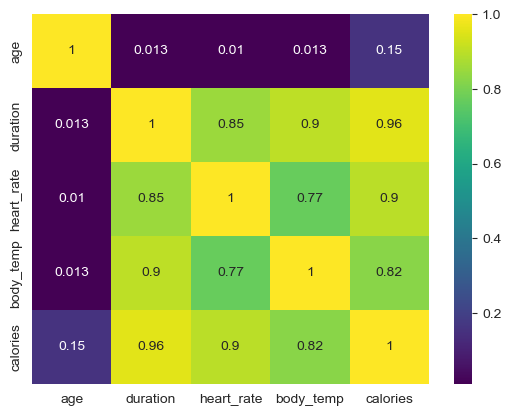

In [72]:
# display the correlation between features and target variables 
sns.heatmap(calories_burnt_df.drop('gender', axis = 1).corr(), annot = True, cmap = "viridis")
plt.show()

### **(E) Encoding Categorical Features**

Encoding categorical features in machine learning are to transform categorical data into numerical representations that can be understood and processed by machine learning algorithms, facilitating the inclusion of categorical variables in predictive models and enabling the algorithms to effectively learn patterns and make predictions based on categorical information. 

In [73]:
# initialize the label encoder object
label_encoding = LabelEncoder()
# encoding the gender column with numerical labels 
calories_burnt_df['gender'] = label_encoding.fit_transform(calories_burnt_df['gender'])
# display the first five rows
calories_burnt_df.head()

,age,duration,heart_rate,body_temp,gender,calories
0,68,29.0,105.0,40.8,1,231.0
1,20,14.0,94.0,40.3,0,66.0
2,69,5.0,88.0,38.7,1,26.0
3,34,13.0,100.0,40.5,0,71.0
4,27,10.0,81.0,39.8,0,35.0


### **(F) Anomalies Detection using Isolation Forest**

Anomaly detection and the removal of features using Isolation Forest in machine learning are twofold: first, to identify and isolate instances or features within a dataset that deviate significantly from the majority of the data points, which may indicate anomalous behavior or noise; and second, to improve the quality and robustness of the dataset by removing these anomalous features, thereby enhancing the performance and interpretability of machine learning models by reducing the influence of outliers and irrelevant information.

In [74]:
# extract input feature names 
col_features_names = calories_burnt_df.drop('calories', axis = 1).columns

# define the isolation forest with specified parameters
iso = IsolationForest(n_estimators = 100, random_state = 42)

# train the isolation forest model 
iso.fit(calories_burnt_df[col_features_names])

# detect anomalies
predicted_anomalies = iso.predict(calories_burnt_df[col_features_names])

In [75]:
# filter out the rows from the original dataframe where anomalies are predicted by the isolation forest
calories_burnt_df_outliers = calories_burnt_df[predicted_anomalies == -1]
# displaying the dataframe with anomalies
calories_burnt_df_outliers

,age,duration,heart_rate,body_temp,gender,calories
0,68,29.0,105.0,40.8,1,231.0
2,69,5.0,88.0,38.7,1,26.0
4,27,10.0,81.0,39.8,0,35.0
10,36,1.0,74.0,37.8,0,3.0
11,21,17.0,100.0,40.0,0,92.0
...,...,...,...,...,...,...
14986,22,24.0,91.0,40.5,1,78.0
14989,61,27.0,116.0,40.7,1,245.0
14995,20,11.0,92.0,40.4,0,45.0
14998,78,2.0,84.0,38.3,1,11.0


In [76]:
# filter out the rows from the original dataframe where normal are predicted by the isolation forest
calories_burnt_df_normal = calories_burnt_df[predicted_anomalies == 1]
# displaying the dataframe with non-anomalies
calories_burnt_df_normal

,age,duration,heart_rate,body_temp,gender,calories
1,20,14.0,94.0,40.3,0,66.0
3,34,13.0,100.0,40.5,0,71.0
5,36,23.0,96.0,40.7,0,123.0
6,33,22.0,95.0,40.5,0,112.0
7,41,25.0,100.0,40.7,1,143.0
...,...,...,...,...,...,...
14992,27,13.0,92.0,40.1,1,46.0
14993,45,11.0,98.0,39.9,1,60.0
14994,48,10.0,94.0,39.8,0,52.0
14996,27,6.0,85.0,39.2,0,23.0


### **(G) Distribution of Each Feature**

Visualizing the distribution of every input feature in machine learning are to gain insights into the characteristics and properties of each feature within the dataset. 

Q: What are the distributions of age, duration, heart rate, and body temp? 

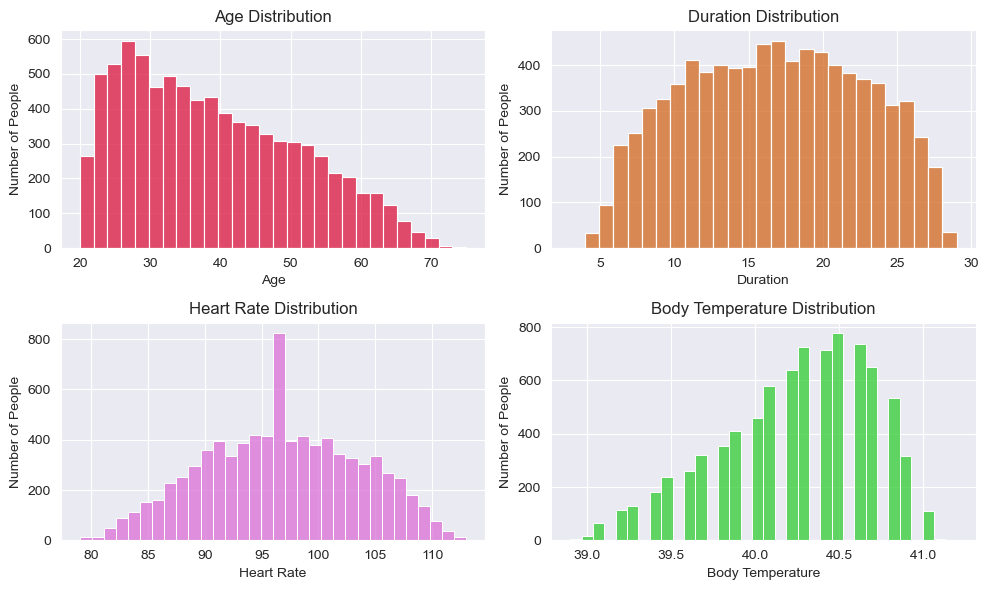

In [77]:
plt.figure(figsize = (10, 6))
plt.subplot(2, 2, 1)
sns.histplot(x = "age", data = calories_burnt_df_normal, color = "crimson")
plt.title("Age Distribution")
plt.xlabel("Age")
plt.ylabel("Number of People")

plt.subplot(2, 2, 2)
sns.histplot(x = "duration", data = calories_burnt_df_normal, color = "chocolate")
plt.title("Duration Distribution")
plt.xlabel("Duration")
plt.ylabel("Number of People")

plt.subplot(2, 2, 3)
sns.histplot(x = "heart_rate", data = calories_burnt_df_normal, color = "orchid")
plt.title("Heart Rate Distribution")
plt.xlabel("Heart Rate")
plt.ylabel("Number of People")

plt.subplot(2, 2, 4)
sns.histplot(x = "body_temp", data = calories_burnt_df_normal, color = "limegreen")
plt.title("Body Temperature Distribution")
plt.xlabel("Body Temperature")
plt.ylabel("Number of People")

plt.tight_layout()
plt.show()

### **(H) Relationship of Between Features and Calories**

Q: How does each feature correlate with the calories? 

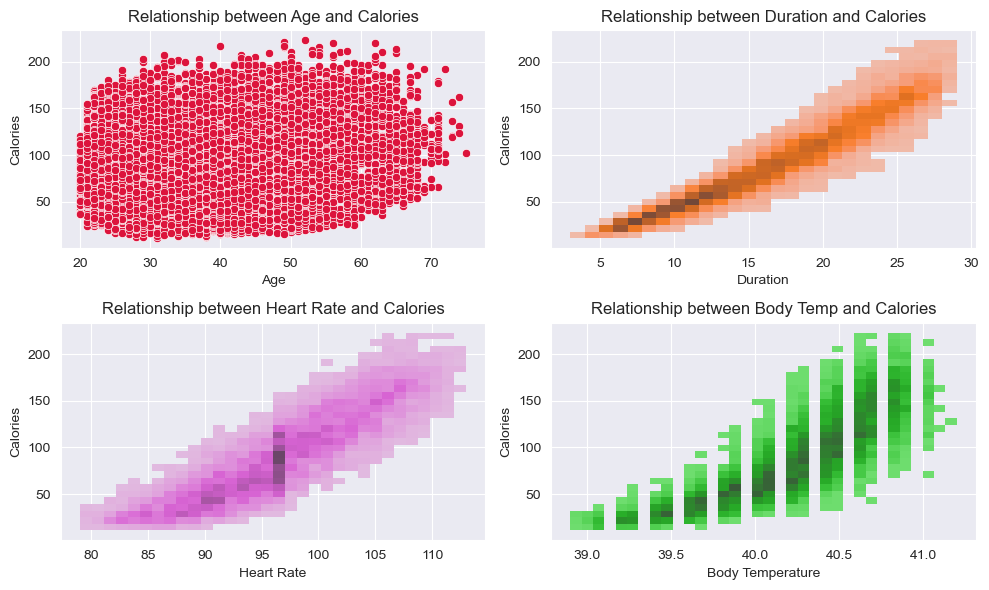

In [78]:
plt.figure(figsize = (10, 6))
plt.subplot(2, 2, 1)
sns.scatterplot(x = "age", y = "calories", data = calories_burnt_df_normal, color = "crimson")
plt.title("Relationship between Age and Calories")
plt.xlabel("Age")
plt.ylabel("Calories")

plt.subplot(2, 2, 2)
sns.histplot(x = "duration", y = "calories", data = calories_burnt_df_normal, color = "chocolate")
plt.title("Relationship between Duration and Calories")
plt.xlabel("Duration")
plt.ylabel("Calories")

plt.subplot(2, 2, 3)
sns.histplot(x = "heart_rate", y = "calories", data = calories_burnt_df_normal, color = "orchid")
plt.title("Relationship between Heart Rate and Calories")
plt.xlabel("Heart Rate")
plt.ylabel("Calories")

plt.subplot(2, 2, 4)
sns.histplot(x = "body_temp", y = "calories", data = calories_burnt_df_normal, color = "limegreen")
plt.title("Relationship between Body Temp and Calories")
plt.xlabel("Body Temperature")
plt.ylabel("Calories")

plt.tight_layout()
plt.show()

### **(I) Data Partitioning**

Using a train-test split into 80% training and 20% testing is to create separate subsets of data for training and evaluation in machine learning models. By allocating the majority of the data (80%) to the training set, the model can learn patterns and relationships from a sufficient amount of data. The remaining portion (20%) allocated to the testing set serves as an independent dataset for evaluating the trained model's performance on unseen data. 

In [79]:
# split the normal dataset into 80% training and 20% testing 
X_train, X_test, y_train, y_test = train_test_split(calories_burnt_df_normal.drop('calories', axis = 1), 
                                                    calories_burnt_df_normal['calories'], 
                                                    test_size = 0.2, 
                                                    shuffle = True, 
                                                    random_state = 42)

print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(6680, 5)
(1671, 5)
(6680,)
(1671,)


### **(J) Data Transformation**

Data transformation using standard scaler for input features in machine learning is to standardize the scale of the features, making them comparable and facilitating more effective model training. Standardization involves transforming the features such that they have a mean of 0 and a standard deviation of 1. This process removes the mean and scales the data to unit variance, ensuring that each feature contributes equally to the model's learning process. 

In [80]:
# initialize standard scaler to scale the features
standard_scaler = StandardScaler()
# scaling the training data using the StandardScaler
X_train[col_features_names] = standard_scaler.fit_transform(X_train[col_features_names])
# scaling the testing data using the same scaler 
X_test[col_features_names] = standard_scaler.transform(X_test[col_features_names])
# display the first five rows 
X_train.head()

,age,duration,heart_rate,body_temp,gender
3491,-1.356574,-0.118306,0.046234,-0.528044,1.000599
14987,0.237907,1.010668,0.777746,1.045253,-0.999401
3923,-0.080989,-0.279588,-0.392673,0.146226,-0.999401
9921,0.158183,0.849386,-0.246370,0.595740,-0.999401
2112,-1.037678,1.817078,1.216653,1.045253,1.000599


## **Deep Neural Network (DNN)**

The DNN model defined here utilizes a Sequential architecture, consisting of fully connected layers with specific configurations. The first layer comprises 64 neurons with a Gaussian Error Linear Unit (GELU) activation function and L2 regularization. A dropout layer with a rate of 0.1 is employed to mitigate overfitting by randomly deactivating a fraction of neurons during training. Finally, the output layer consists of a single neuron with a Rectified Linear Unit (ReLU) activation function, producing continuous predictions for the target variable. This architecture is designed to effectively capture complex patterns in the input data with regularization and dropout mechanisms to enhance generalization and prevent overfitting.

In [81]:
def dnn_model():
    model = Sequential()
    # add a fully connected layers 
    model.add(Dense(64, kernel_regularizer = "l2", input_dim = 5, activation = "gelu"))
    # add a dropout 
    model.add(Dropout(0.1))
    # add an output layer 
    model.add(Dense(1, activation = "relu"))
    return model


**Hold-Out Validation**

**Hold-out validation**, also known as train-test split validation, is a technique used to evaluate the performance of a machine learning model. The objective of hold-out validation is to assess how well the trained model generalizes to unseen data, which simulates real-world scenarios where the model encounters new instances that were not used during training.

The process involves splitting the available dataset into two subsets: a training set and a testing set. The training set is used to train the model, while the testing set is kept separate and used only for evaluation. By training the model on one subset of the data and evaluating its performance on another independent subset, hold-out validation provides an unbiased estimate of the model's performance on unseen data.

In [82]:
with tf.device("/CPU"):
    # create a keras regressor with defined DNN model
    dnn_regressor = KerasRegressor(model = dnn_model,
                            loss = "mean_squared_error",
                            epochs = 30, 
                            batch_size = 32, 
                            optimizer = Adamax(learning_rate = 0.001),
                            metrics = [RootMeanSquaredError, R2Score],
                            random_state = 42)
    # fitting the regressor model
    dnn_regressor.fit(X_train, y_train, validation_split = 0.2)


Epoch 1/30
167/167 [==============================] - 0s 1ms/step - loss: 10364.0518 - root_mean_squared_error: 101.8035 - r2_score: -3.8938 - val_loss: 10109.7197 - val_root_mean_squared_error: 100.5465 - val_r2_score: -3.8248
Epoch 2/30
167/167 [==============================] - 0s 641us/step - loss: 9810.1318 - root_mean_squared_error: 99.0455 - r2_score: -3.6322 - val_loss: 9416.2451 - val_root_mean_squared_error: 97.0366 - val_r2_score: -3.4938
Epoch 3/30
167/167 [==============================] - 0s 637us/step - loss: 8946.8750 - root_mean_squared_error: 94.5870 - r2_score: -3.2246 - val_loss: 8375.9316 - val_root_mean_squared_error: 91.5190 - val_r2_score: -2.9973
Epoch 4/30
167/167 [==============================] - 0s 653us/step - loss: 7735.1826 - root_mean_squared_error: 87.9485 - r2_score: -2.6524 - val_loss: 7065.3535 - val_root_mean_squared_error: 84.0540 - val_r2_score: -2.3718
Epoch 5/30
167/167 [==============================] - 0s 627us/step - loss: 6359.5547 - root_m

167/167 [==============================] - 0s 674us/step - loss: 204.0428 - root_mean_squared_error: 14.2618 - r2_score: 0.9040 - val_loss: 126.8438 - val_root_mean_squared_error: 11.2345 - val_r2_score: 0.9398
Epoch 17/30
167/167 [==============================] - 0s 566us/step - loss: 144.5040 - root_mean_squared_error: 11.9953 - r2_score: 0.9321 - val_loss: 89.7065 - val_root_mean_squared_error: 9.4392 - val_r2_score: 0.9575
Epoch 18/30
167/167 [==============================] - 0s 541us/step - loss: 117.1784 - root_mean_squared_error: 10.7971 - r2_score: 0.9450 - val_loss: 74.1258 - val_root_mean_squared_error: 8.5750 - val_r2_score: 0.9649
Epoch 19/30
167/167 [==============================] - 0s 541us/step - loss: 104.8883 - root_mean_squared_error: 10.2126 - r2_score: 0.9508 - val_loss: 64.4011 - val_root_mean_squared_error: 7.9884 - val_r2_score: 0.9695
Epoch 20/30
167/167 [==============================] - 0s 535us/step - loss: 101.0791 - root_mean_squared_error: 10.0245 - r2_

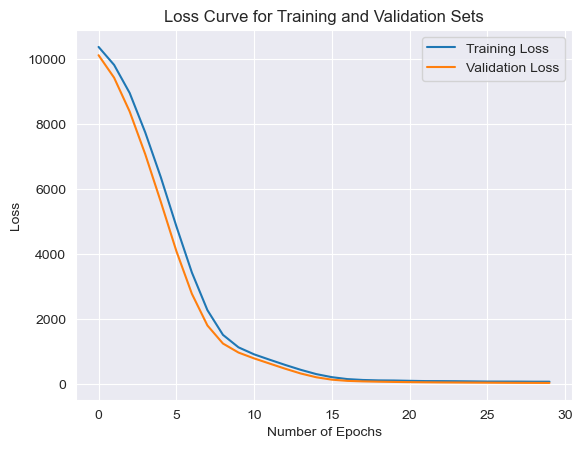

In [83]:
# plotting the training loss
sns.lineplot(data = dnn_regressor.history_['loss'], label = "Training Loss")
# plotting the validation loss
sns.lineplot(data = dnn_regressor.history_['val_loss'], label = "Validation Loss")
# add title and labels
plt.title("Loss Curve for Training and Validation Sets")
plt.xlabel("Number of Epochs")
plt.ylabel("Loss")
plt.show()

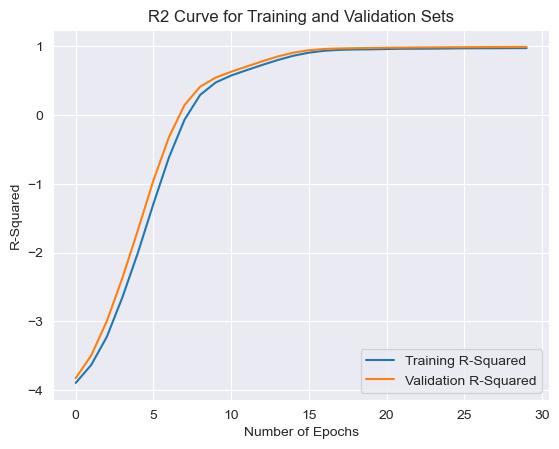

In [84]:
# plotting the training R-Squared
sns.lineplot(data = dnn_regressor.history_['r2_score'], label = "Training R-Squared")
# plotting the validation R-Squared
sns.lineplot(data = dnn_regressor.history_['val_r2_score'], label = "Validation R-Squared")
# add a title and labels 
plt.title("R2 Curve for Training and Validation Sets")
plt.xlabel("Number of Epochs")
plt.ylabel("R-Squared")
plt.show()

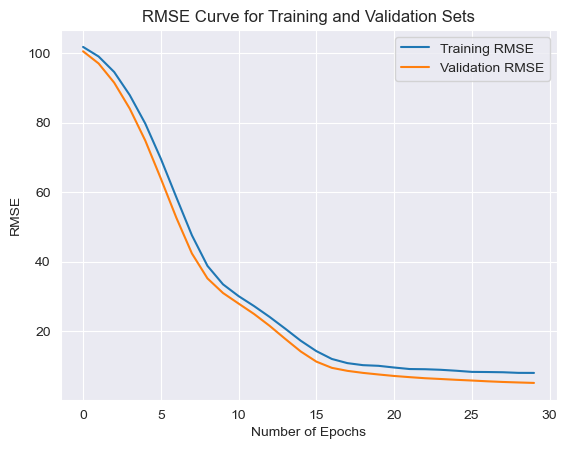

In [85]:
# plotting the training RMSE
sns.lineplot(data = dnn_regressor.history_['root_mean_squared_error'], label = "Training RMSE")
# plotting the validation RMSE
sns.lineplot(data = dnn_regressor.history_['val_root_mean_squared_error'], label = "Validation RMSE")
# add title and labels 
plt.title("RMSE Curve for Training and Validation Sets")
plt.xlabel("Number of Epochs")
plt.ylabel("RMSE")
plt.show()

In [86]:
# predict the calories for the training and testing sets based on DNN
pred_train_dnn = dnn_regressor.predict(X_train)
pred_test_dnn = dnn_regressor.predict(X_test)

# display the training and testing evaluation scores
print()
print("Hold-Out Validation (Training Scores): ")
print("======================================")
print("R2-Score: {:.4f}".format(r2_score(y_train, pred_train_dnn)))
print("RMSE: {:.4f}".format(np.sqrt(mean_squared_error(y_train, pred_train_dnn))))
print()
print("Hold-Out Validation (Testing Scores): ")
print("======================================")
print("R2-Score: {:.4f}".format(r2_score(y_test, pred_test_dnn)))
print("RMSE: {:.4f}".format(np.sqrt(mean_squared_error(y_test, pred_test_dnn))))

 16/209 [=>............................] - ETA: 0s 

53/53 [==============================] - 0s 2ms/step

Hold-Out Validation (Training Scores): 
R2-Score: 0.9872
RMSE: 5.1994

Hold-Out Validation (Testing Scores): 
R2-Score: 0.9873
RMSE: 5.1511


**Training Scores:**

- **R2-Score (Coefficient of Determination):** The R2-score of 0.9872 suggests that approximately 98.72% of the variance in the calorie expenditure data is explained by the model. This high value indicates an excellent fit of the model to the training data.
- **RMSE (Root Mean Squared Error):** The RMSE value of 5.1994 indicates the average deviation of the predicted calorie expenditure values from the actual values in the training dataset. A lower RMSE signifies better accuracy, and in this case, the value is relatively low, suggesting that the model's predictions closely align with the actual values.

**Testing Scores:**

- **R2-Score (Coefficient of Determination):** The R2-score of 0.9873 for the testing dataset indicates that the model generalizes well to unseen data. It suggests that approximately 98.73% of the variance in the calorie expenditure data from the testing dataset is explained by the model.
- **RMSE (Root Mean Squared Error):** The RMSE value of 5.1511 for the testing dataset is slightly lower than the RMSE for the training dataset. This indicates that the model's performance on unseen data is also excellent, with predictions that are very close to the actual values.

**Comparison Plot**

The objective of such a comparison plot is to assess how closely the model's predictions align with the actual values for both the training and testing datasets.

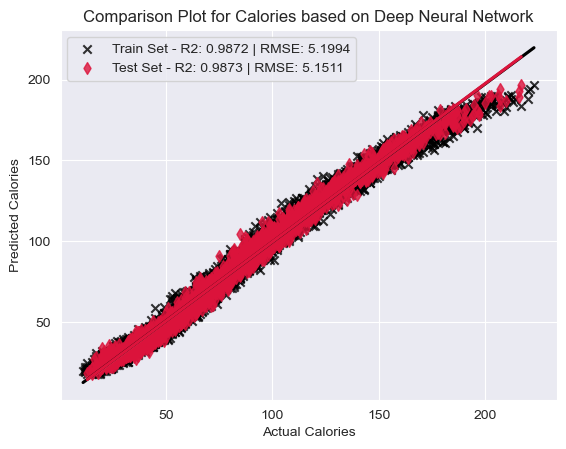

In [87]:
dnn_df_train = pd.DataFrame() 
dnn_df_test = pd.DataFrame()

dnn_df_train['Actual Train'] = y_train
dnn_df_train['Predicted Train'] = pred_train_dnn
dnn_df_test['Actual Test'] = y_test
dnn_df_test['Predicted Test'] = pred_test_dnn

sns.set_style("darkgrid")
sns.regplot(x = "Actual Train", y = "Predicted Train", marker = 'x', data = dnn_df_train, color = "black", label = "Train Set - R2: {:.4f} | RMSE: {:.4f}".format(r2_score(y_train, pred_train_dnn), np.sqrt(mean_squared_error(y_train, pred_train_dnn))))
sns.regplot(x = "Actual Test", y = "Predicted Test", marker = 'd', data = dnn_df_test, color = "crimson", label = "Test Set - R2: {:.4f} | RMSE: {:.4f}".format(r2_score(y_test, pred_test_dnn), np.sqrt(mean_squared_error(y_test, pred_test_dnn))))
plt.title("Comparison Plot for Calories based on Deep Neural Network")
plt.xlabel("Actual Calories")
plt.ylabel("Predicted Calories")
plt.legend()
plt.show()

Both the train set and test set exhibit high linearity and closely follow the diagonal line, it indicates that the model's predictions are consistently aligned with the actual values across different subsets of the data. This suggests that the model has learned the underlying patterns in the data well and can make accurate predictions.

**K-Fold Cross-Validation**

**K-Fold Cross-Validation** is a technique used to evaluate the performance of a machine learning model more robustly than hold-out validation. The objective of K-Fold Cross-Validation is to assess how well the model generalizes to unseen data by systematically splitting the available dataset into multiple subsets, or "folds," and using each fold as both a training and testing set.

In [88]:
# initialize K-Fold cross-validator 
cv = KFold(n_splits = 10, shuffle = True, random_state = 42)

# initialize lists to store RMSE and R2 scores for training and validation sets
dnn_rmse_score_list_train = list()
dnn_rmse_score_list_val = list()
dnn_r2_score_list_train = list()
dnn_r2_score_list_val = list()

# loop through k-fold cross-validation splits 
for train_idx, val_idx in cv.split(X_train):
    # split data into training and validation sets 
    X_train_cv, X_val_cv = X_train.iloc[train_idx], X_train.iloc[val_idx]
    y_train_cv, y_val_cv = y_train.iloc[train_idx], y_train.iloc[val_idx]

    with tf.device("/CPU"):
        # create keras regressor model 
        dnn_regressor_cv = KerasRegressor(model = dnn_model,
                                    loss = "mean_squared_error",
                                    epochs = 30, 
                                    batch_size = 32, 
                                    optimizer = Adamax(learning_rate = 0.001),
                                    metrics = [RootMeanSquaredError, R2Score],
                                    random_state = 42)
        # fit the model to training data with validation split 
        dnn_regressor_cv.fit(X_train_cv, y_train_cv, validation_split = 0.2)

        # perform predictions on training and validation sets 
        y_pred_train = dnn_regressor_cv.predict(X_train_cv)
        y_pred_val = dnn_regressor_cv.predict(X_val_cv)

        # calculate R2 and RMSE scores for training set and validation set
        r2_score_train = r2_score(y_train_cv, y_pred_train)
        rmse_score_train = np.sqrt(mean_squared_error(y_train_cv, y_pred_train))
        r2_score_val = r2_score(y_val_cv, y_pred_val)
        rmse_score_val = np.sqrt(mean_squared_error(y_val_cv, y_pred_val))

        # append R2 and RMSE scores for training and validation sets to respective lists 
        dnn_r2_score_list_train.append(r2_score_train)
        dnn_rmse_score_list_train.append(rmse_score_train)
        dnn_r2_score_list_val.append(r2_score_val)
        dnn_rmse_score_list_val.append(rmse_score_val)

Epoch 1/30


151/151 [==============================] - 0s 1ms/step - loss: 10355.5039 - root_mean_squared_error: 101.7615 - r2_score: -3.8594 - val_loss: 10088.3379 - val_root_mean_squared_error: 100.4401 - val_r2_score: -3.8720
Epoch 2/30
151/151 [==============================] - 0s 693us/step - loss: 9895.0449 - root_mean_squared_error: 99.4732 - r2_score: -3.6433 - val_loss: 9497.8857 - val_root_mean_squared_error: 97.4564 - val_r2_score: -3.5868
Epoch 3/30
151/151 [==============================] - 0s 680us/step - loss: 9128.4414 - root_mean_squared_error: 95.5420 - r2_score: -3.2835 - val_loss: 8615.7568 - val_root_mean_squared_error: 92.8201 - val_r2_score: -3.1608
Epoch 4/30
151/151 [==============================] - 0s 636us/step - loss: 8108.4150 - root_mean_squared_error: 90.0455 - r2_score: -2.8049 - val_loss: 7477.0366 - val_root_mean_squared_error: 86.4684 - val_r2_score: -2.6108
Epoch 5/30
151/151 [==============================] - 0s 640us/step - loss: 6825.6841 - root_mean_squared

In [89]:
# display the training and testing evaluation scores
print("K-Fold Cross-Validation (Training Scores): ")
print("===========================================")
print("Mean R2-Score: {:.4f}".format(np.mean(dnn_r2_score_list_train)))
print("Mean RMSE: {:.4f}".format(np.mean(dnn_rmse_score_list_train)))
print()
print("K-Fold Cross-Validation (Testing Scores): ")
print("==========================================")
print("Mean R2-Score: {:.4f}".format(np.mean(dnn_r2_score_list_val)))
print("Mean RMSE: {:.4f}".format(np.mean(dnn_rmse_score_list_val)))

K-Fold Cross-Validation (Training Scores): 
Mean R2-Score: 0.9845
Mean RMSE: 5.7260

K-Fold Cross-Validation (Testing Scores): 
Mean R2-Score: 0.9843
Mean RMSE: 5.7469


**Training Scores:**

- **Mean R2-Score:** The average R2-score across all folds is 0.9845. This value indicates that, on average, approximately 98.45% of the variance in the calorie expenditure data is explained by the model across different folds of the training data. It suggests a strong fit of the model to the training data across multiple splits.
- **Mean RMSE:** The average RMSE across all folds is 5.7260. This value represents the average deviation of the predicted calorie expenditure values from the actual values in the training dataset across all folds. A lower RMSE signifies better accuracy, and while 5.7260 is relatively low, it reflects the consistency of the model's performance across different subsets of the training data.

**Testing Scores:**
- **Mean R2-Score:** The average R2-score across all folds for the testing dataset is 0.9843. This value indicates that, on average, approximately 98.43% of the variance in the calorie expenditure data from the testing dataset is explained by the model across different folds. It suggests that the model generalizes well to unseen data and maintains a high level of performance across multiple splits.
- **Mean RMSE:** The average RMSE across all folds for the testing dataset is 5.7469. This value represents the average deviation of the predicted calorie expenditure values from the actual values in the testing dataset across all folds. Similar to the training RMSE, a lower value indicates better accuracy, and while 5.7469 is slightly higher than the training RMSE, it still reflects a consistent and accurate performance of the model across different subsets of the testing data.

## **1-Dimensional Convolutional Neural Network (1D-CNN)**

The architecture for the 1D-CNN model described here comprises several layers designed to process one-dimensional sequential data effectively. Beginning with an input layer that accommodates the shape of the input data, subsequent layers include a 1D convolutional layer with 32 filters and a kernel size of 2, applying the Gaussian Error Linear Unit (GELU) activation function. The output of the convolutional layer is then flattened to a one-dimensional array to be fed into fully connected dense layers, starting with a dense layer containing 64 neurons with L2 regularization and GELU activation. A dropout regularization layer with a dropout rate of 0.1 is added to mitigate overfitting. Finally, an output layer with a single neuron and Rectified Linear Unit (ReLU) activation function is appended to produce continuous predictions for the target variable. This architecture leverages the capabilities of 1D convolutional operations to extract meaningful features from sequential data, while dense layers facilitate higher-level pattern recognition and prediction.

In [90]:
# reshape the training data and testing data to comply with the input shape requirements of the 1D-CNN
X_train_reshape = X_train.values.reshape(X_train.shape[0], X_train.shape[1], 1)
X_test_reshape = X_test.values.reshape(X_test.shape[0], X_test.shape[1], 1)

# display the shape of the reshaped training and testing data
print(X_train_reshape.shape)
print(X_test_reshape.shape)

(6680, 5, 1)
(1671, 5, 1)


In [91]:
def conv1D_model():
    model = Sequential()
    # add input layer 
    model.add(Input(shape = (X_train_reshape.shape[1], X_train_reshape.shape[2])))
    # add 1D-CNN
    model.add(Conv1D(32, kernel_size = 2, activation = "gelu"))
    # flattening the output convolutional layer
    model.add(Flatten())
    # add a fully connected dense layers 
    model.add(Dense(64, kernel_regularizer = "l2", input_dim = 5, activation = "gelu"))
    # add dropout regularization 
    model.add(Dropout(0.1))
    # add output layer 
    model.add(Dense(1, activation = "relu"))
    return model 

**Hold-Out Validation**

**Hold-out validation**, also known as train-test split validation, is a technique used to evaluate the performance of a machine learning model. The objective of hold-out validation is to assess how well the trained model generalizes to unseen data, which simulates real-world scenarios where the model encounters new instances that were not used during training.

The process involves splitting the available dataset into two subsets: a training set and a testing set. The training set is used to train the model, while the testing set is kept separate and used only for evaluation. By training the model on one subset of the data and evaluating its performance on another independent subset, hold-out validation provides an unbiased estimate of the model's performance on unseen data.

In [92]:
with tf.device("/CPU"):
    # create a keras regressor with defined 1D-CNN
    conv1D_regressor = KerasRegressor(model = conv1D_model,
                            loss = "mean_squared_error",
                            epochs = 30, 
                            batch_size = 32, 
                            optimizer = Adamax(learning_rate = 0.001),
                            metrics = [RootMeanSquaredError, R2Score],
                            random_state = 42)
    # fit the regressor model 
    conv1D_regressor.fit(X_train, y_train, validation_split = 0.2)


Epoch 1/30
 79/167 [=============>................] - ETA: 0s - loss: 10403.6729 - root_mean_squared_error: 101.9939 - r2_score: -3.8648 

167/167 [==============================] - 0s 1ms/step - loss: 9723.7070 - root_mean_squared_error: 98.6037 - r2_score: -3.5910 - val_loss: 8136.4541 - val_root_mean_squared_error: 90.1952 - val_r2_score: -2.8825
Epoch 2/30
167/167 [==============================] - 0s 715us/step - loss: 5310.4702 - root_mean_squared_error: 72.8607 - r2_score: -1.5067 - val_loss: 2321.9670 - val_root_mean_squared_error: 48.1618 - val_r2_score: -0.1070
Epoch 3/30
167/167 [==============================] - 0s 710us/step - loss: 1064.1914 - root_mean_squared_error: 32.5775 - r2_score: 0.4989 - val_loss: 474.0459 - val_root_mean_squared_error: 21.6987 - val_r2_score: 0.7753
Epoch 4/30
167/167 [==============================] - 0s 708us/step - loss: 306.0480 - root_mean_squared_error: 17.3984 - r2_score: 0.8571 - val_loss: 118.4753 - val_root_mean_squared_error: 10.7249 - val_r2_score: 0.9451
Epoch 5/30
167/167 [==============================] - 0s 700us/step - loss: 140.0291 - root_mean_squared_error: 11.6

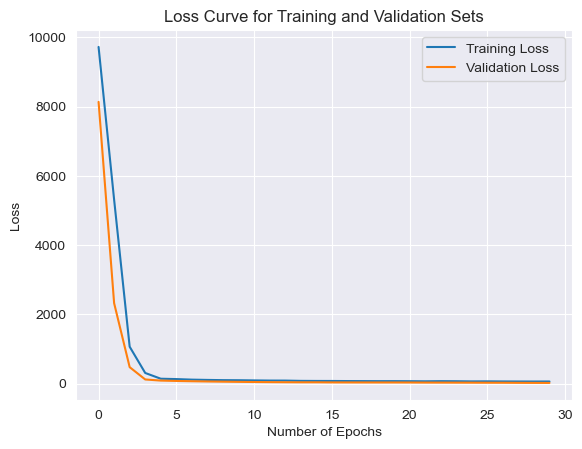

In [93]:
# plotting the training loss
sns.lineplot(data = conv1D_regressor.history_['loss'], label = "Training Loss")
# plotting the validation loss
sns.lineplot(data = conv1D_regressor.history_['val_loss'], label = "Validation Loss")
# adding title and labels 
plt.title("Loss Curve for Training and Validation Sets")
plt.xlabel("Number of Epochs")
plt.ylabel("Loss")
plt.show()

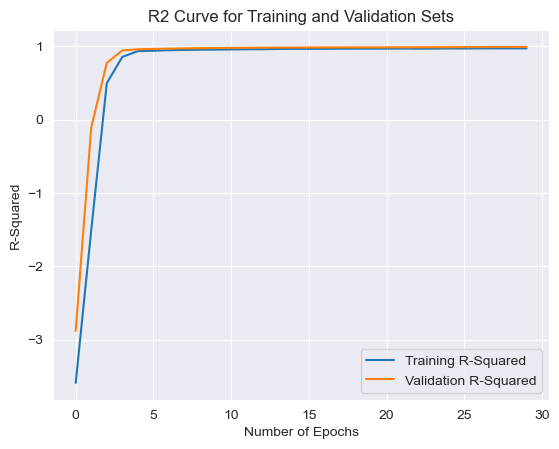

In [94]:
# plotting the training R-Squared
sns.lineplot(data = conv1D_regressor.history_['r2_score'], label = "Training R-Squared")
# plotting the validation R-Squared 
sns.lineplot(data = conv1D_regressor.history_['val_r2_score'], label = "Validation R-Squared")
# add title and labels 
plt.title("R2 Curve for Training and Validation Sets")
plt.xlabel("Number of Epochs")
plt.ylabel("R-Squared")
plt.show()

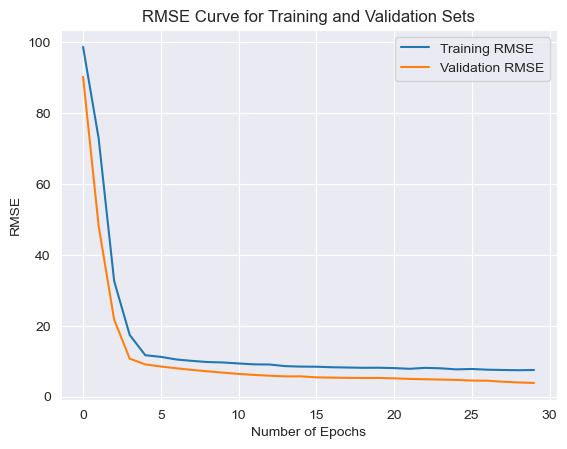

In [95]:
# plotting the training RMSE 
sns.lineplot(data = conv1D_regressor.history_['root_mean_squared_error'], label = "Training RMSE")
# plotting the validation RMSE
sns.lineplot(data = conv1D_regressor.history_['val_root_mean_squared_error'], label = "Validation RMSE")
# add title and labels 
plt.title("RMSE Curve for Training and Validation Sets")
plt.xlabel("Number of Epochs")
plt.ylabel("RMSE")
plt.show()

In [96]:
# predict the calories for the training and testing sets based on the 1D-CNN
pred_train_conv1D = conv1D_regressor.predict(X_train)
pred_test_conv1D = conv1D_regressor.predict(X_test)

# display the training and testing evaluation scores 
print()
print("Training Scores: ")
print("=========================")
print("R2-Score: {:.4f}".format(r2_score(y_train, pred_train_conv1D)))
print("RMSE: {:.4f}".format(np.sqrt(mean_squared_error(y_train, pred_train_conv1D))))
print()
print("Testing Scores: ")
print("=========================")
print("R2-Score: {:.4f}".format(r2_score(y_test, pred_test_conv1D)))
print("RMSE: {:.4f}".format(np.sqrt(mean_squared_error(y_test, pred_test_conv1D))))

  1/209 [..............................] - ETA: 17s

53/53 [==============================] - 0s 2ms/step

Training Scores: 
R2-Score: 0.9926
RMSE: 3.9422

Testing Scores: 
R2-Score: 0.9927
RMSE: 3.9180


**Training Scores:**

- **R2-Score (Coefficient of Determination):** The R2-score of 0.9926 indicates that approximately 99.26% of the variance in the calorie expenditure data is explained by the model during training. This high value suggests an exceptional fit of the model to the training data, capturing the underlying patterns with great accuracy.
- **RMSE (Root Mean Squared Error):** The RMSE value of 3.9422 reflects the average deviation between the predicted calorie expenditure values and the actual values in the training dataset. With a lower RMSE indicating better accuracy, 3.9422 signifies that the model's predictions closely align with the ground truth values in the training set.

**Testing Scores:**

- **R2-Score (Coefficient of Determination):** The R2-score of 0.9927 for the testing dataset indicates that the model generalizes remarkably well to unseen data. Approximately 99.27% of the variance in the calorie expenditure data from the testing dataset is explained by the model, demonstrating its ability to capture the underlying patterns effectively.
- **RMSE (Root Mean Squared Error):** The RMSE value of 3.9180 for the testing dataset is slightly lower than the RMSE for the training dataset. This suggests that the model's performance on unseen data is even slightly better than on the training data, with predictions closely matching the actual calorie expenditure values.


**Comparison Plot**

The objective of such a comparison plot is to assess how closely the model's predictions align with the actual values for both the training and testing datasets.

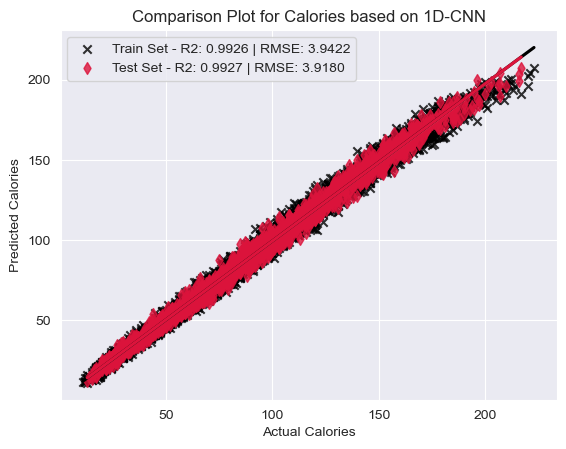

In [97]:
conv1d_df_train = pd.DataFrame() 
conv1d_df_test = pd.DataFrame()

conv1d_df_train['Actual Train'] = y_train
conv1d_df_train['Predicted Train'] = pred_train_conv1D
conv1d_df_test['Actual Test'] = y_test
conv1d_df_test['Predicted Test'] = pred_test_conv1D

sns.set_style("darkgrid")
sns.regplot(x = "Actual Train", y = "Predicted Train", marker = 'x', data = conv1d_df_train, color = "black", label = "Train Set - R2: {:.4f} | RMSE: {:.4f}".format(r2_score(y_train, pred_train_conv1D), np.sqrt(mean_squared_error(y_train, pred_train_conv1D))))
sns.regplot(x = "Actual Test", y = "Predicted Test", marker = 'd', data = conv1d_df_test, color = "crimson", label = "Test Set - R2: {:.4f} | RMSE: {:.4f}".format(r2_score(y_test, pred_test_conv1D), np.sqrt(mean_squared_error(y_test, pred_test_conv1D))))
plt.title("Comparison Plot for Calories based on 1D-CNN")
plt.xlabel("Actual Calories")
plt.ylabel("Predicted Calories")
plt.legend()
plt.show()

Both the train set and test set exhibit high linearity and closely follow the diagonal line, it indicates that the model's predictions are consistently aligned with the actual values across different subsets of the data. This suggests that the model has learned the underlying patterns in the data well and can make accurate predictions.

**K-Fold Cross-Validation**

**K-Fold Cross-Validation** is a technique used to evaluate the performance of a machine learning model more robustly than hold-out validation. The objective of K-Fold Cross-Validation is to assess how well the model generalizes to unseen data by systematically splitting the available dataset into multiple subsets, or "folds," and using each fold as both a training and testing set.

In [98]:
# initialize K-Fold cross-validator 
cv = KFold(n_splits = 10, shuffle = True, random_state = 42)

# initialize lists to store RMSE and R2 scores for training and validation sets
conv1d_rmse_score_list_train = list()
conv1d_rmse_rmse_score_list_val = list()
conv1d_r2_score_list_train = list()
conv1d_r2_score_list_val = list()

# loop through k-fold cross-validation splits 
for train_idx, val_idx in cv.split(X_train_reshape):
    # split data into training and validation sets 
    X_train_cv, X_val_cv = X_train_reshape[train_idx], X_train_reshape[val_idx]
    y_train_cv, y_val_cv = y_train.iloc[train_idx], y_train.iloc[val_idx]

    with tf.device("/CPU"):
        # create keras regressor model 
        conv1d_regressor_cv = KerasRegressor(model = conv1D_model,
                                            loss = "mean_squared_error",
                                            epochs = 30, 
                                            batch_size = 32, 
                                            optimizer = Adamax(learning_rate = 0.001),
                                            metrics = [RootMeanSquaredError, R2Score],
                                            random_state = 42)
        # fit the model to training data with validation split 
        conv1d_regressor_cv.fit(X_train_cv, y_train_cv, validation_split = 0.2)

        # perform predictions on training and validation sets 
        y_pred_train = conv1d_regressor_cv.predict(X_train_cv)
        y_pred_val = conv1d_regressor_cv.predict(X_val_cv)

        # calculate R2 and RMSE scores for training set and validation set
        r2_score_train = r2_score(y_train_cv, y_pred_train)
        rmse_score_train = np.sqrt(mean_squared_error(y_train_cv, y_pred_train))
        r2_score_val = r2_score(y_val_cv, y_pred_val)
        rmse_score_val = np.sqrt(mean_squared_error(y_val_cv, y_pred_val))

        # append R2 and RMSE scores for training and validation sets to respective lists 
        conv1d_r2_score_list_train.append(r2_score_train)
        conv1d_rmse_score_list_train.append(rmse_score_train)
        conv1d_r2_score_list_val.append(r2_score_val)
        conv1d_rmse_rmse_score_list_val.append(rmse_score_val)

Epoch 1/30
151/151 [==============================] - 0s 1ms/step - loss: 9819.5439 - root_mean_squared_error: 99.0886 - r2_score: -3.6075 - val_loss: 8483.7471 - val_root_mean_squared_error: 92.1007 - val_r2_score: -3.0965
Epoch 2/30
151/151 [==============================] - 0s 792us/step - loss: 6180.5273 - root_mean_squared_error: 78.6060 - r2_score: -1.8995 - val_loss: 3286.6858 - val_root_mean_squared_error: 57.3108 - val_r2_score: -0.5862
Epoch 3/30
151/151 [==============================] - 0s 787us/step - loss: 1516.4175 - root_mean_squared_error: 38.9065 - r2_score: 0.2897 - val_loss: 650.7704 - val_root_mean_squared_error: 25.4495 - val_r2_score: 0.6872
Epoch 4/30
151/151 [==============================] - 0s 785us/step - loss: 476.6274 - root_mean_squared_error: 21.7576 - r2_score: 0.7779 - val_loss: 218.5900 - val_root_mean_squared_error: 14.6705 - val_r2_score: 0.8961
Epoch 5/30
151/151 [==============================] - 0s 799us/step - loss: 175.7893 - root_mean_squared_

In [99]:
# display the training and testing evaluation scores
print("K-Fold Cross-Validation (Training Scores): ")
print("===========================================")
print("Mean R2-Score: {:.4f}".format(np.mean(conv1d_r2_score_list_train)))
print("Mean RMSE: {:.4f}".format(np.mean(conv1d_rmse_score_list_train)))
print()
print("K-Fold Cross-Validation (Testing Scores): ")
print("==========================================")
print("Mean R2-Score: {:.4f}".format(np.mean(conv1d_r2_score_list_val)))
print("Mean RMSE: {:.4f}".format(np.mean(conv1d_rmse_score_list_train)))

K-Fold Cross-Validation (Training Scores): 
Mean R2-Score: 0.9910
Mean RMSE: 4.3522

K-Fold Cross-Validation (Testing Scores): 
Mean R2-Score: 0.9909
Mean RMSE: 4.3522


**Training Scores**

- **Mean R2-Score:** The average R2-score across all folds is 0.9910. This indicates that, on average, approximately 99.10% of the variance in the calorie expenditure data is explained by the model across different folds of the training data. This high value suggests a strong fit of the model to the training data, capturing the underlying patterns effectively.
- **Mean RMSE:** The average RMSE across all folds is 4.3522. This value represents the average deviation of the predicted calorie expenditure values from the actual values in the training dataset across all folds. A lower RMSE signifies better accuracy, and while 4.3522 is relatively low, it reflects the consistency of the model's performance across different subsets of the training data.

**Testing Scores**

- **Mean R2-Score:** The average R2-score across all folds for the testing dataset is 0.9909. This value indicates that, on average, approximately 99.09% of the variance in the calorie expenditure data from the testing dataset is explained by the model across different folds. It suggests that the model generalizes well to unseen data and maintains a high level of performance across multiple splits.
- **Mean RMSE:** The average RMSE across all folds for the testing dataset is also 4.3522. This value represents the average deviation of the predicted calorie expenditure values from the actual values in the testing dataset across all folds. Similar to the training RMSE, a lower value indicates better accuracy, and while 4.3522 is relatively low, it still reflects a consistent and accurate performance of the model across different subsets of the testing data.

## **Conclusion**

Based on the cross-validation results obtained, it is evident that both the 1D-CNN model and the DNN model demonstrate strong performance in predicting calorie expenditure. However, upon closer examination, the 1D-CNN model outperforms the DNN model in terms of both mean R2-score and mean RMSE, indicating higher accuracy and better fit to the data. The 1D-CNN model achieved a mean R2-score of 0.9910 and a mean RMSE of 4.3522, while the DNN model attained a mean R2-score of 0.9845 and a mean RMSE of 5.7260. Furthermore, the testing scores for the 1D-CNN model (mean R2-score: 0.9909, mean RMSE: 4.3522) closely align with the training scores, indicating robust generalization to unseen data. In contrast, the DNN model exhibits a slightly lower performance on the testing dataset compared to the training dataset, suggesting potential overfitting. Therefore, based on the superior performance metrics and generalization ability, the 1D-CNN model is deemed the most suitable choice for predicting calorie expenditure in this scenario.